## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [2]:
# Installing the libraries with the specified version.
!pip install numpy pandas scikit-learn matplotlib seaborn xgboost imbalanced-learn -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [3]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Data pre-processing and split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ensemble classifiers
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# To tune different models
from sklearn.model_selection import RandomizedSearchCV

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive/')

path_to_file = './data//EasyVisa.csv'
easy_visa_dataFrame = pd.read_csv(path_to_file)

# Copy the original DataFrame for further manipulation
data = easy_visa_dataFrame.copy()

Mounted at /content/drive/


## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [5]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [6]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [7]:
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')

The dataset has 25480 rows and 12 columns.


#### Check the data types of the columns for the dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [9]:
# check for duplicate entries in the dataset
print(f"Number of duplicate rows: {data.duplicated().sum()}")

Number of duplicate rows: 0


## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [10]:
data.describe(include="all")

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480.000000,25480.000000,25480,25480.000000,25480,25480,25480
unique,25480,6,4,2,2,NaN,NaN,5,NaN,4,2,2
top,EZYV25480,Asia,Bachelor's,Y,N,NaN,NaN,Northeast,NaN,Year,Y,Certified
freq,1,16861,10234,14802,22525,NaN,NaN,7195,NaN,22962,22773,17018
mean,NaN,NaN,NaN,NaN,NaN,5667.043210,1979.409929,NaN,74455.814592,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,22877.928848,42.366929,NaN,52815.942327,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-26.000000,1800.000000,NaN,2.136700,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1022.000000,1976.000000,NaN,34015.480000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2109.000000,1997.000000,NaN,70308.210000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3504.000000,2005.000000,NaN,107735.512500,NaN,NaN,NaN


#### Minimum no_of_employees has a negative entry of -26. Let's locate all negatives and fix that before proceeding with EDA.

#### Fixing the negative values in number of employees columns

In [11]:
negative_no_of_employees = data.loc[data['no_of_employees'] < 0].shape[0]
print(f"Number of negative values in no_of_employees column: {negative_no_of_employees}")

# Correcting Negative values by taking the absolute value
data['no_of_employees'] = data['no_of_employees'].abs()

negative_no_of_employees = data.loc[data['no_of_employees'] < 0].shape[0]
print(f"Number of negative values after data treatment: {negative_no_of_employees}")

Number of negative values in no_of_employees column: 33
Number of negative values after data treatment: 0


#### Checking if case_id is unique? If yes, then we can drop it as it will not add value to the analysis

In [12]:
if data['case_id'].is_unique == True:
    print("case_id is unique. Droping case_id from dataset.")
    # Droping case_id from dataset
    data.drop('case_id', axis=1, inplace=True)
else:
    print("case_id is not unique. Do nothing.")

case_id is unique. Droping case_id from dataset.


#### Let's check the count of each unique category in each of the categorical variables

In [13]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("=" * 50)

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64
full_time_position
Y    22773
N     2707
Name: count, dtype: int64
case_status
Certified    17018
Denied        8462
Name: count, dtype: int64


### Univariate Analysis

In [14]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

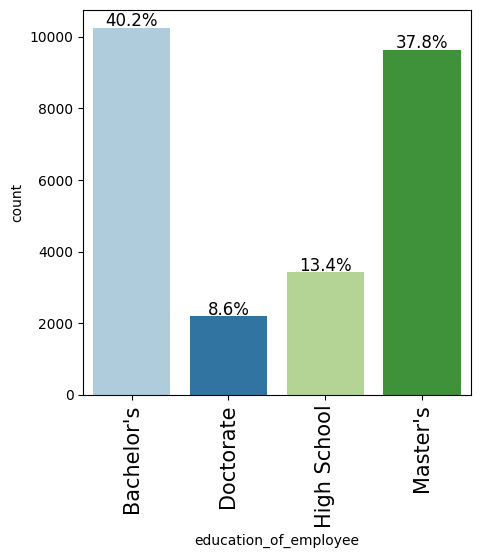

In [16]:
labeled_barplot(data, "education_of_employee", perc=True)

#### Observations on region of employment

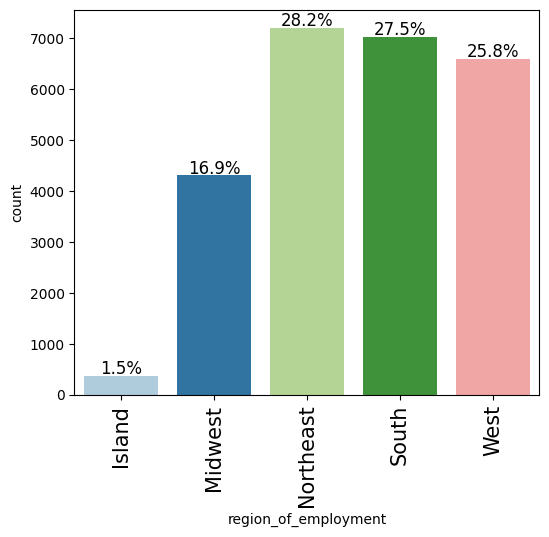

In [17]:
labeled_barplot(data, "region_of_employment", perc=True)

#### Observations on job experience

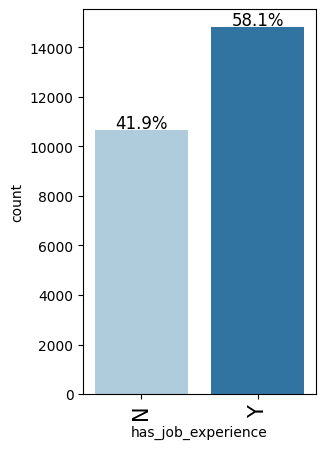

In [18]:
labeled_barplot(data, "has_job_experience", perc=True)

#### Observations on case status

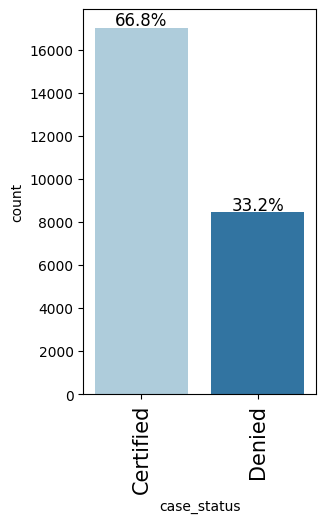

In [19]:
labeled_barplot(data, "case_status", perc=True)

####Observations of Univariate analysis

- Most of the applicants have a Bachelor's degree (approx. 38%), followed by a Master's degree (approx. 33%), and High School (approx. 22%). Doctorate degrees are the least common (approx. 7%).
- The top 3 regions of employment are the Northeast, South, and West, each with a significant portion of the applications (around 28-30%). The Midwest has the fewest applications (around 13%).
- A large majority of applicants (around 57%) have job experience.
- There is a significant class imbalance in the target variable `case_status`. Certified cases make up about 66% of the dataset, while Denied cases make up about 33%.

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

In [20]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [21]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Does higher education increase the chances of visa certification for well-paid jobs abroad?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


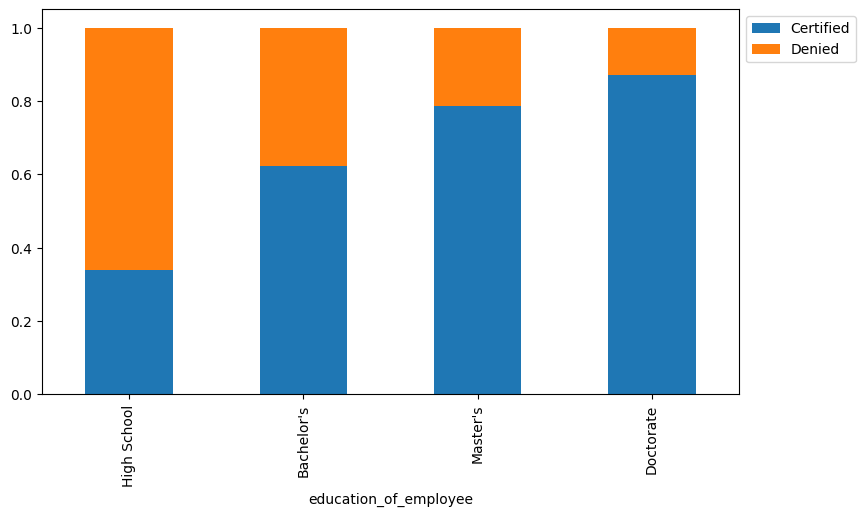

In [22]:
stacked_barplot(data, "education_of_employee", "case_status")

#### How does visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


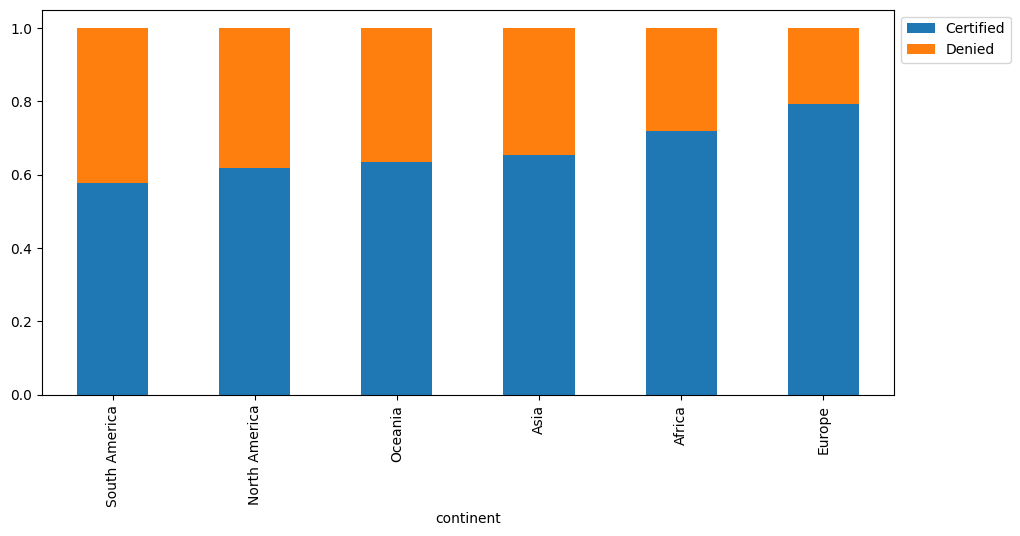

In [23]:
stacked_barplot(data, "continent", "case_status")

#### Does having prior work experience influence the chances of visa certification for career opportunities abroad?

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


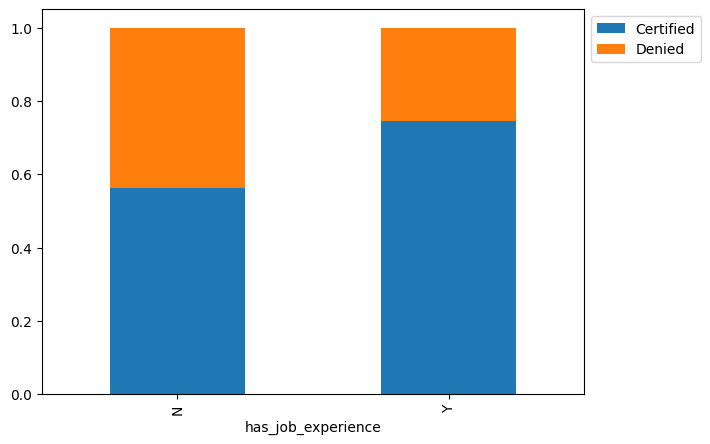

In [24]:
stacked_barplot(data, "has_job_experience", "case_status")

#### Is the prevailing wage consistent across all regions of the US?

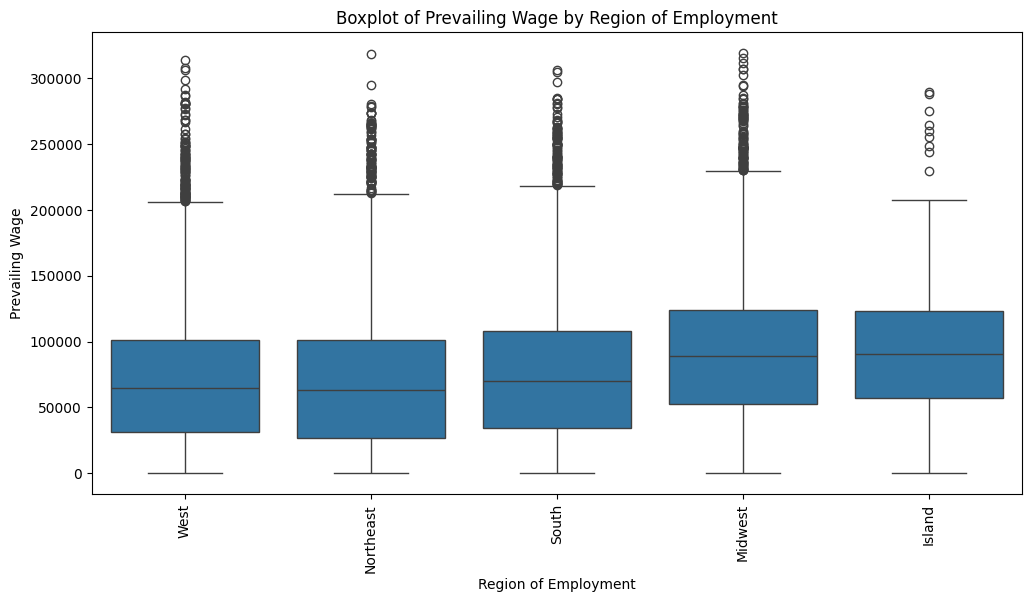

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='region_of_employment', y='prevailing_wage', data=data)
plt.xticks(rotation=90)
plt.title('Boxplot of Prevailing Wage by Region of Employment')
plt.xlabel('Region of Employment')
plt.ylabel('Prevailing Wage')
plt.show()

#### Does visa status vary with changes in the prevailing wage set to protect both local talent and foreign workers?

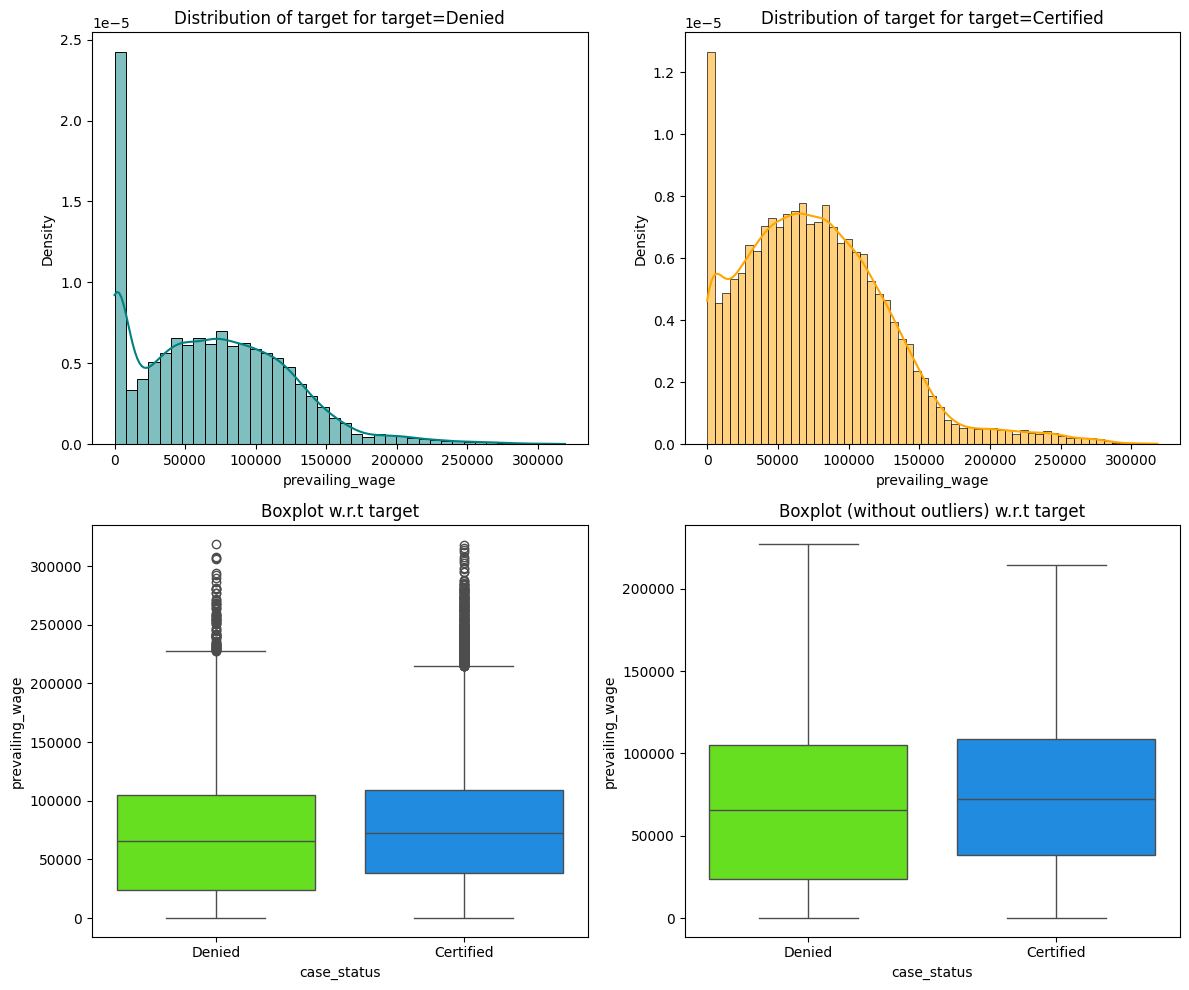

In [26]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

#### Does the unit of prevailing wage (Hourly, Weekly, etc.) have any impact on the likelihood of visa application certification?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


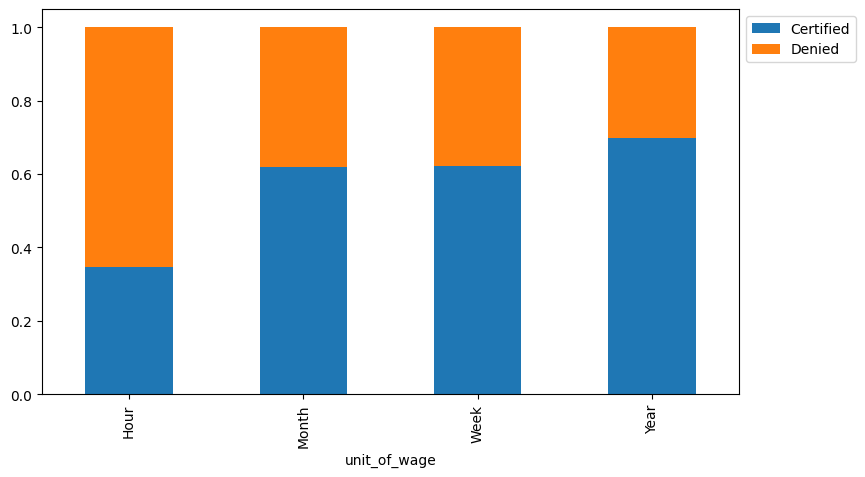

In [27]:
stacked_barplot(data, "unit_of_wage", "case_status")

####Observations on Bivariate analysis.

*   **Education vs. Case Status:** Applicants with a doctorate have a significantly higher chance of visa certification compared to those with lower education levels. This suggests that higher education is a strong positive factor for visa approval.
*   **Continent vs. Case Status:** Asia has the lowest visa certification rate compared to other continents. This might indicate regional differences in applicant profiles, application quality, or other factors not captured in the data.
*   **Job Experience vs. Case Status:** Applicants with job experience have a higher rate of visa certification than those without. Having prior work experience appears to be a beneficial factor for visa approval.
*   **Region of Employment vs. Prevailing Wage:** There are noticeable variations in prevailing wages across different regions of employment. The West and Northeast regions appear to have higher median prevailing wages compared to the South and Midwest.
*   **Prevailing Wage vs. Case Status:** There is some difference in the distribution of prevailing wages between certified and denied cases. Certified cases tend to have a slightly higher median prevailing wage. However, both distributions have long tails, indicating a wide range of wages in both certified and denied applications.
*   **Unit of Wage vs. Case Status:** The `unit_of_wage` has a significant impact on case status. Applications with a `Yearly` unit of wage have a much higher certification rate than those with `Hourly`, `Weekly`, or `Monthly` units. This suggests that applications with annual salaries are more likely to be certified.

## Data Pre-processing

### Outlier Check

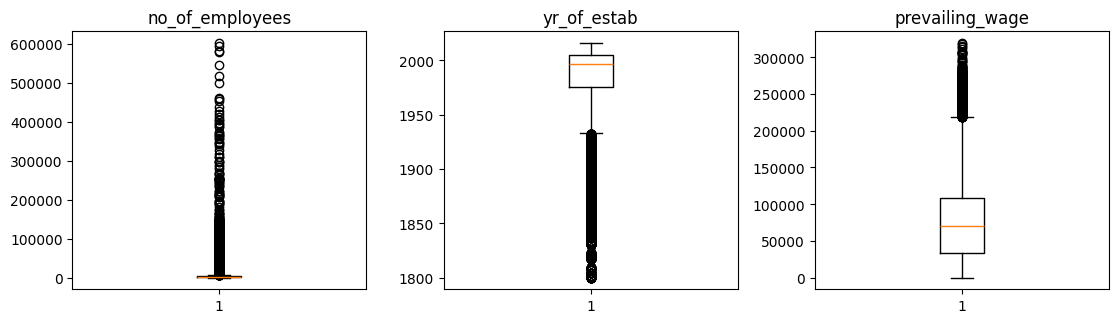

In [28]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

####Observation on outlier check

From the boxplots generated for the numerical columns (`no_of_employees`, `yr_of_estab`, and `prevailing_wage`), we can observe the presence of outliers:

*   **no_of_employees:** There are many data points far above the upper quartile, indicating a significant number of companies with a very high number of employees compared to the majority.
*   **yr_of_estab:** There are data points below the lower quartile and above the upper quartile, suggesting the presence of companies established in very early years (potential outliers on the lower side) and possibly some data entry errors or extremely recent establishments (potential outliers on the upper side).
*   **prevailing_wage:** This column exhibits a large number of outliers significantly above the upper quartile, indicating many applications with exceptionally high prevailing wages. These outliers suggest a wide range of salaries in the dataset, with some being considerably higher than the typical wage.

### Data Preparation for modeling

In [29]:
# Convert Dependent field to numeric
data['case_status'] = data['case_status'].apply(lambda x: 1 if x == 'Certified' else 0)

# Seperating Indepentant and Dependent features
X = data.drop(['case_status'],axis=1)
y = data['case_status']

# Applying One Hot encoding
X = pd.get_dummies(X,drop_first=True)

# Splitting Train, Validation and Test dataset
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)
X_val,X_test,y_val,y_test = train_test_split(
    X_val,y_val,test_size=0.1,random_state=1,stratify=y_val
)

In [30]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of test set : ", X_test.shape)
print("-" * 50)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("-" * 50)
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("-" * 50)
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of Validation set :  (6879, 21)
Shape of test set :  (765, 21)
--------------------------------------------------
Percentage of classes in training set:
case_status
1    0.667919
0    0.332081
Name: proportion, dtype: float64
--------------------------------------------------
Percentage of classes in validation set:
case_status
1    0.66783
0    0.33217
Name: proportion, dtype: float64
--------------------------------------------------
Percentage of classes in test set:
case_status
1    0.667974
0    0.332026
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

- Choose the primary metric to evaluate the model on
- Elaborate on the rationale behind choosing the metric

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The `model_performance_classification_sklearn` function will be used to check the model performance of models.
* The `confusion_matrix_sklearn` function will be used to plot the confusion matrix.

In [31]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

#### Defining scorer to be used for cross-validation and hyperparameter tuning

In [32]:
scorer = metrics.make_scorer(f1_score, greater_is_better=True)

#### Reason for choosing F1 Score

*   **Precision** measures the accuracy of the positive predictions (how many of the predicted 'Certified' cases were actually 'Certified'). High precision is important because misclassifying a denied case as certified could lead to inefficient processing of applications and potentially allow ineligible individuals to proceed.
*   **Recall** measures the model's ability to find all positive instances (how many of the actual 'Certified' cases were correctly identified). High recall is important because misclassifying a certified case as denied would lead to denying a potentially eligible applicant, which is undesirable for both the applicant and the company seeking talent.

The F1-score is the harmonic mean of precision and recall. It gives equal weight to both metrics, making it a suitable choice when you want to balance the trade-off between minimizing false positives (important for precision) and minimizing false negatives (important for recall).


**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with Original data

In [33]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring = scorer,cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train,y_train)
    scores = f1_score(y_val, model.predict(X_val))

    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.7754467419381872
Random forest: 0.8031383296203435
GBM: 0.8236772733014497
Adaboost: 0.8195228965788536
Xgboost: 0.8089018568405709
dtree: 0.7398268032422285

Validation Performance:

Bagging: 0.7675817565350541
Random forest: 0.7972364702187794
GBM: 0.8195818459969403
Adaboost: 0.8158053488839735
Xgboost: 0.8070320579110651
dtree: 0.7477497255762898


### Model Building with Oversampled data

In [34]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 11913
Before OverSampling, counts of label '0': 5923 

After OverSampling, counts of label '1': 11913
After OverSampling, counts of label '0': 11913 

After OverSampling, the shape of train_X: (23826, 21)
After OverSampling, the shape of train_y: (23826,) 



In [35]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over,scoring = scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over,y_train_over)
    scores = f1_score(y_val, model.predict(X_val))

    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.7597364450891436
Random forest: 0.7949888607780384
GBM: 0.8061052289956541
Adaboost: 0.8004129012242016
Xgboost: 0.8016497215584085
dtree: 0.7260765028494454

Validation Performance:

Bagging: 0.7606724176067242
Random forest: 0.7953896584540552
GBM: 0.8125259228535877
Adaboost: 0.8120255086547221
Xgboost: 0.8039950062421972
dtree: 0.7387687188019967


### Model Building with Undersampled data

In [36]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 11913
Before UnderSampling, counts of label '0': 5923 

After UnderSampling, counts of label '1': 5923
After UnderSampling, counts of label '0': 5923 

After UnderSampling, the shape of train_X: (11846, 21)
After UnderSampling, the shape of train_y: (11846,) 



In [37]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=10, shuffle=True, random_state=1
    )
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un,scoring = scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un,y_train_un)
    scores = f1_score(y_val, model.predict(X_val))

    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.648376671972561
Random forest: 0.6875023869467406
GBM: 0.712085878138409
Adaboost: 0.7004337719805565
Xgboost: 0.6916133208114543
dtree: 0.6202564273420623

Validation Performance:

Bagging: 0.6916956737941323
Random forest: 0.734144015259895
GBM: 0.7608695652173914
Adaboost: 0.7604202747950584
Xgboost: 0.7423652871123688
dtree: 0.6839080459770115


## Hyperparameter Tuning

**Best practices for hyperparameter tuning in AdaBoost:**

`n_estimators`:

- Start with a specific number (50 is used in general) and increase in steps: 50, 75, 85, 100

- Use fewer estimators (e.g., 50 to 100) if using complex base learners (like deeper decision trees)

- Use more estimators (e.g., 100 to 150) when learning rate is low (e.g., 0.1 or lower)

- Avoid very high values unless performance keeps improving on validation

`learning_rate`:

- Common values to try: 1.0, 0.5, 0.1, 0.01

- Use 1.0 for faster training, suitable for fewer estimators

- Use 0.1 or 0.01 when using more estimators to improve generalization

- Avoid very small values (< 0.01) unless you plan to use many estimators (e.g., >500) and have sufficient data


---

In [38]:
%%time

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50, 75, 85, 100, 125, 150],
    "learning_rate": [1.0, 0.5, 0.1, 0.01],
    "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=5,
    random_state=1
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

CPU times: user 11min 59s, sys: 1.24 s, total: 12min 1s
Wall time: 12min 5s


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1),
                   n_iter=50, n_jobs=-2,
                   param_distributions={'estimator': [DecisionTreeClassifier(max_depth=1,
                                                                             random_state=1),
                                                      DecisionTreeClassifier(max_depth=2,
                                                                             random_state=1),
                                                      DecisionTreeClassifier(max_depth=3,
                                                                             random_state=1)],
                                        'learning_rate': [1.0, 0.5, 0.1, 0.01],
                                        'n_estimators': [50, 75, 85, 100, 125,
                                                         150]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [39]:
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 1.0, 'estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.7983888515430675:


In [40]:
tuned_ada = randomized_cv.best_estimator_
tuned_ada

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   n_estimators=100, random_state=1)

In [41]:
# Re-fitting on the best model
tuned_ada.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   n_estimators=100, random_state=1)

In [42]:
tuned_ada_train_perf = model_performance_classification_sklearn(tuned_ada, X_train_over, y_train_over)
tuned_ada_train_perf

,Accuracy,Recall,Precision,F1
0,0.787501,0.840426,0.759982,0.798182


In [43]:
## Complete the code to check the model performance for validation data.
tuned_ada_val_perf = model_performance_classification_sklearn(tuned_ada,X_val,y_val)
tuned_ada_val_perf

,Accuracy,Recall,Precision,F1
0,0.734554,0.839573,0.779822,0.808595


**Best practices for hyperparameter tuning in Random Forest:**


`n_estimators`:

* Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125
* Higher values generally improve performance but increase training time
* Use 100-150 for large datasets or when variance is high


`min_samples_leaf`:

* Try values like: 1, 2, 4, 5, 10
* Higher values reduce model complexity and help prevent overfitting
* Use 1–2 for low-bias models, higher (like 5 or 10) for more regularized models
* Works well in noisy datasets to smooth predictions


`max_features`:

* Try values: `"sqrt"` (default for classification), `"log2"`, `None`, or float values (e.g., `0.3`, `0.5`)
* `"sqrt"` balances between diversity and performance for classification tasks
* Lower values (e.g., `0.3`) increase tree diversity, reducing overfitting
* Higher values (closer to `1.0`) may capture more interactions but risk overfitting


`max_samples` (for bootstrap sampling):

* Try float values between `0.5` to `1.0` or fixed integers
* Use `0.6–0.9` to introduce randomness and reduce overfitting
* Smaller values increase diversity between trees, improving generalization

---

In [44]:
%%time

# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50, 100, 125, 150, 200, 300],
    "min_samples_leaf": [5, 10, 15, 20, 50],
    "max_features": [0.7, 0.8, 0.9, 1.0],
    "max_samples": [0.7, 0.8, 0.9]
}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=5,
    random_state=1
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

CPU times: user 18min 55s, sys: 1.98 s, total: 18min 57s
Wall time: 19min 7s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
                   n_iter=50, n_jobs=-2,
                   param_distributions={'max_features': [0.7, 0.8, 0.9, 1.0],
                                        'max_samples': [0.7, 0.8, 0.9],
                                        'min_samples_leaf': [5, 10, 15, 20, 50],
                                        'n_estimators': [50, 100, 125, 150, 200,
                                                         300]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [45]:
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 50, 'min_samples_leaf': 20, 'max_samples': 0.7, 'max_features': 0.7} with CV score=0.7185273396280814:


In [46]:
tuned_rf = randomized_cv.best_estimator_
tuned_rf

RandomForestClassifier(max_features=0.7, max_samples=0.7, min_samples_leaf=20,
                       n_estimators=50, random_state=1)

In [47]:
# Re-fitting on the best model
tuned_rf.fit(X_train_un, y_train_un)

RandomForestClassifier(max_features=0.7, max_samples=0.7, min_samples_leaf=20,
                       n_estimators=50, random_state=1)

In [48]:
tuned_rf_train_perf = model_performance_classification_sklearn(
    tuned_rf, X_train_un, y_train_un
)
tuned_rf_train_perf

,Accuracy,Recall,Precision,F1
0,0.752575,0.767348,0.745326,0.756177


In [49]:
## Complete the code to print the model performance on the validation data.
tuned_rf_val_perf = model_performance_classification_sklearn(tuned_rf,X_val,y_val)
tuned_rf_val_perf

,Accuracy,Recall,Precision,F1
0,0.702428,0.714192,0.817186,0.762226


**Best practices for hyperparameter tuning in Gradient Boosting:**

`n_estimators`:

* Start with 100 (default) and increase: 100, 200, 300, 500
* Typically, higher values lead to better performance, but they also increase training time
* Use 200–500 for larger datasets or complex problems
* Monitor validation performance to avoid overfitting, as too many estimators can degrade generalization


`learning_rate`:

* Common values to try: 0.1, 0.05, 0.01, 0.005
* Use lower values (e.g., 0.01 or 0.005) if you are using many estimators (e.g., > 200)
* Higher learning rates (e.g., 0.1) can be used with fewer estimators for faster convergence
* Always balance the learning rate with `n_estimators` to prevent overfitting or underfitting


`subsample`:

* Common values: 0.7, 0.8, 0.9, 1.0
* Use a value between `0.7` and `0.9` for improved generalization by introducing randomness
* `1.0` uses the full dataset for each boosting round, potentially leading to overfitting
* Reducing `subsample` can help reduce overfitting, especially in smaller datasets


`max_features`:

* Common values: `"sqrt"`, `"log2"`, or float (e.g., `0.3`, `0.5`)
* `"sqrt"` (default) works well for classification tasks
* Lower values (e.g., `0.3`) help reduce overfitting by limiting the number of features considered at each split

---

In [50]:
%%time

# defining model
model = GradientBoostingClassifier(random_state=1)

param_grid={
    "n_estimators": [100, 200, 300, 500],
    "learning_rate": [0.1, 0.05, 0.01, 0.005],
    "subsample":[0.7, 0.8, 0.9, 1.0],
    "max_features":[0.7, 0.8, 0.9, 1.0]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=5,
    random_state=1
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

CPU times: user 31min 22s, sys: 3.41 s, total: 31min 25s
Wall time: 31min 38s


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
                   n_iter=50, n_jobs=-2,
                   param_distributions={'learning_rate': [0.1, 0.05, 0.01,
                                                          0.005],
                                        'max_features': [0.7, 0.8, 0.9, 1.0],
                                        'n_estimators': [100, 200, 300, 500],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [51]:
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 300, 'max_features': 1.0, 'learning_rate': 0.1} with CV score=0.8020103546772624:


In [52]:
tuned_gbm = randomized_cv.best_estimator_
tuned_gbm

GradientBoostingClassifier(max_features=1.0, n_estimators=300, random_state=1,
                           subsample=0.9)

In [53]:
# Re-fitting on the best model
tuned_gbm.fit(X_train_over, y_train_over)

GradientBoostingClassifier(max_features=1.0, n_estimators=300, random_state=1,
                           subsample=0.9)

In [54]:
tuned_gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, X_train_over, y_train_over
)
tuned_gbm_train_perf

,Accuracy,Recall,Precision,F1
0,0.809032,0.870226,0.775335,0.820044


In [55]:
## Complete the code to print the model performance on the validation data.
tuned_gbm_val_perf = model_performance_classification_sklearn(tuned_gbm,X_val,y_val)
tuned_gbm_val_perf

,Accuracy,Recall,Precision,F1
0,0.738479,0.851545,0.777888,0.813052


**Best practices for hyperparameter tuning in XGBoost:**

`n_estimators`:

* Start with 50 and increase in steps: 50,75,100,125.
* Use more estimators (e.g., 150-250) when using lower learning rates
* Monitor validation performance
* High values improve learning but increase training time

`subsample`:

* Common values: 0.5, 0.7, 0.8, 1.0
* Use `0.7–0.9` to introduce randomness and reduce overfitting
* `1.0` uses the full dataset in each boosting round; may overfit on small datasets
* Values < 0.5 are rarely useful unless dataset is very large

`gamma`:

* Try values: 0 (default), 1, 3, 5, 8
* Controls minimum loss reduction needed for a split
* Higher values make the algorithm more conservative (i.e., fewer splits)
* Use values > 0 to regularize and reduce overfitting, especially on noisy data


`colsample_bytree`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled per tree
* Lower values (e.g., 0.3 or 0.5) increase randomness and improve generalization
* Use `1.0` when you want all features considered for every tree


`colsample_bylevel`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled at each tree level (i.e., per split depth)
* Lower values help in regularization and reducing overfitting
* Often used in combination with `colsample_bytree` for fine control over feature sampling

---

In [56]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

param_grid={
    'n_estimators':[50,75,100,125],
    'subsample':[0.7, 0.8, 1.0],
    'gamma':[0, 1, 3, 5, 8],
    'colsample_bytree':[0.6, 0.7, 1.0],
    'colsample_bylevel':[0.3, 0.5, 0.7, 1.0],
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=5,
    random_state=1
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

CPU times: user 1min 51s, sys: 698 ms, total: 1min 52s
Wall time: 1min 5s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=1, ...),
                   n_iter=50, n_jobs=-2,
                   param_distributions={'colsample_bylevel': [0.3, 0.5, 0.7,
                                                              1.0],
                                        'colsample_bytree': [0.6, 0.7, 1.0],
                                        'gamma': [0, 1, 3, 5, 8],
                                        'n_estimators': [50, 75, 100, 125],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [57]:
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 1.0, 'n_estimators': 100, 'gamma': 3, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.7} with CV score=0.8040053741293045:


In [58]:
tuned_xgb = randomized_cv.best_estimator_
tuned_xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [59]:
# Re-fitting on the best model
tuned_xgb.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [60]:
tuned_xgb_train_perf = model_performance_classification_sklearn(
    tuned_xgb, X_train_over, y_train_over
)
tuned_xgb_train_perf

,Accuracy,Recall,Precision,F1
0,0.805591,0.872408,0.769567,0.817767


In [61]:
## Complete the code to print the model performance on the validation data.
tuned_xgb_val_perf = model_performance_classification_sklearn(tuned_xgb,X_val,y_val)
tuned_xgb_val_perf

,Accuracy,Recall,Precision,F1
0,0.739206,0.85764,0.775591,0.814554


## Model Performance Summary and Final Model Selection

In [62]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        tuned_gbm_train_perf.T,
        tuned_xgb_train_perf.T,
        tuned_ada_train_perf.T,
        tuned_rf_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "XGBoost tuned with oversampled data",
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient Boosting tuned with oversampled data,XGBoost tuned with oversampled data,AdaBoost tuned with oversampled data,Random forest tuned with undersampled data
Accuracy,0.809032,0.805591,0.787501,0.752575
Recall,0.870226,0.872408,0.840426,0.767348
Precision,0.775335,0.769567,0.759982,0.745326
F1,0.820044,0.817767,0.798182,0.756177


In [63]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        tuned_gbm_val_perf.T,
        tuned_xgb_val_perf.T,
        tuned_ada_val_perf.T,
        tuned_rf_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "XGBoost tuned with oversampled data",
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with undersampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Gradient Boosting tuned with oversampled data,XGBoost tuned with oversampled data,AdaBoost tuned with oversampled data,Random forest tuned with undersampled data
Accuracy,0.738479,0.739206,0.734554,0.702428
Recall,0.851545,0.857640,0.839573,0.714192
Precision,0.777888,0.775591,0.779822,0.817186
F1,0.813052,0.814554,0.808595,0.762226


In [68]:
print('AdaBoostClassifier took 12min 5s.')
print('RandomForestClassifier took 18min 57s')
print('GradientBoostingClassifier took 31min 25s')
print('XGBClassifier took 1min 52 s')

AdaBoostClassifier took 12min 5s.
RandomForestClassifier took 18min 57s
GradientBoostingClassifier took 31min 25s
XGBClassifier took 1min 52 s


#### Final Model selection

* Both Gradient Boost and XGBoost show similar result.
* Selecting Tuned XGBoost model for final testing

In [69]:
# selecting the final model as Gradient Boosting tuned with oversampled data
final_model = tuned_xgb

In [71]:
test = model_performance_classification_sklearn(final_model, X_test, y_test)
test

,Accuracy,Recall,Precision,F1
0,0.763399,0.882583,0.788462,0.832872


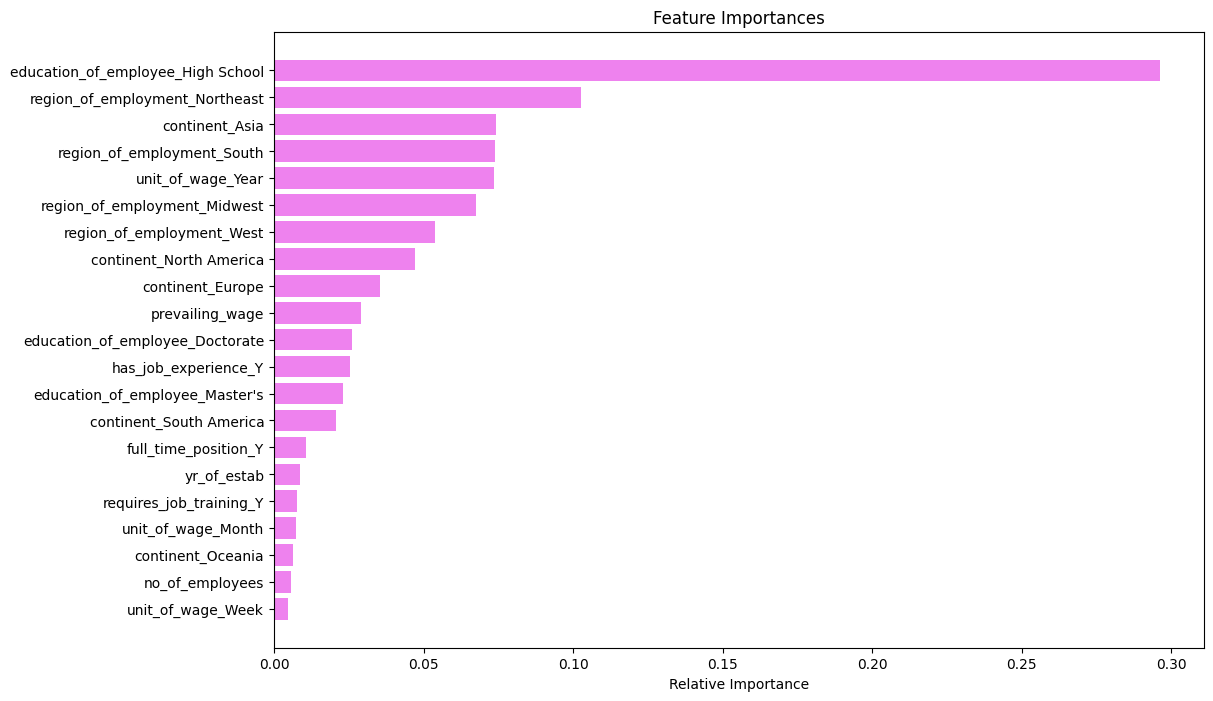

In [72]:
# Determining the Important features affecting the decision making
feature_names = X_train.columns
importances = final_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Actionable Insights and Recommendations

Based on the analysis and the performance of the models, here are the actionable insights and recommendations:

**Actionable Insights:**

*   **Education Matters:** A doctorate degree significantly increases the chances of visa certification. This indicates a strong demand for highly educated individuals in the US workforce.
*   **Experience is Key:** Applicants with prior job experience have a higher probability of visa approval. This highlights the value employers place on relevant work history.
*   **Geographic Disparities Exist:** Asia has a lower visa certification rate compared to other continents. This could be due to a variety of factors, including the volume of applications, specific skills in demand in the US, or differing application standards.
*   **Wage Unit Impact:** The unit of prevailing wage (`Yearly`) is a strong indicator of a certified case. This suggests that positions offering annual salaries are more likely to be certified, potentially reflecting more stable or higher-skilled roles.
*   **Prevailing Wage Influence:** While not as impactful as the unit of wage, a higher prevailing wage is somewhat associated with certified cases. This aligns with the objective of the OFLC to ensure foreign workers are not underpaid.
*   **Regional Wage Variations:** Prevailing wages differ across US regions, with the West and Northeast generally having higher median wages. This is important context when evaluating applications for specific regions.
*   **Outliers in Numerical Data:** The presence of outliers in `no_of_employees`, `yr_of_estab`, and `prevailing_wage` indicates that there are some companies and prevailing wages that are significantly different from the norm. While these outliers were not explicitly handled in the modeling process shown, they might warrant further investigation depending on the business context.
*   **Class Imbalance:** The dataset has a clear imbalance, with more certified cases than denied ones. Oversampling the minority class (`Denied`) improved the performance of some models, particularly boosting algorithms like Gradient Boosting and XGBoost, in correctly identifying denied cases (as suggested by the F1-score).

**Recommendations:**

*   **Prioritize Highly Educated and Experienced Applicants:** To streamline the process and focus resources, OFLC could initially prioritize applications from individuals with doctorate degrees and significant job experience, as they have a higher likelihood of certification.
*   **Investigate the Asia Discrepancy:** Further analysis is needed to understand why applications from Asia have a lower certification rate. This could involve examining the types of jobs applied for, education and experience levels of applicants from Asia, or potential differences in the application process or documentation from that region. This insight can inform targeted guidance or process improvements.
*   **Consider Prevailing Wage Unit in Evaluation:** The unit of prevailing wage, particularly `Yearly`, should be a significant factor in the initial screening or evaluation of applications. Applications with yearly salaries are more likely to be certified and could be processed with higher priority.
*   **Utilize the Developed Model for Shortlisting:** The trained Gradient Boosting model (tuned with oversampled data) shows good performance in identifying both certified and denied cases, as indicated by the F1-score on the test set. OFLC can integrate this model into their workflow to automatically predict the case status and flag applications that are highly likely to be certified or denied. This can help in efficiently allocating resources and accelerating the processing of straightforward cases.
*   **Focus Manual Review on Model Predictions:** Applications predicted as 'Denied' by the model, especially those that might have factors like lower education or no job experience, can be prioritized for detailed manual review by OFLC officers to ensure accuracy and compliance.
*   **Monitor Model Performance Regularly:** The performance of the model should be monitored over time with new data to ensure its continued accuracy and relevance as immigration patterns and job market demands change.
*   **Explore Outlier Handling:** While not critical for the current model's performance based on the chosen metrics, future iterations could explore strategies for handling the observed outliers in numerical features, such as capping or transformation, to see if it further improves model robustness.
*   **Feature Importance-Based Guidance:** The feature importances from the final model can be used to inform applicants and employers about the key factors that influence visa certification. This transparency can help improve the quality of future applications. The plot shows that `prevailing_wage`, `yr_of_estab`, and region of employment are among the most important features.

<font size=6 color='blue'>Power Ahead</font>
___